In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from qube import Dataset, Axis
import qube.postprocess.postprocess as pp
from qube.postprocess.figures import Plot1D, Plot2D

# Example dataset with a 1D sinus

<IPython.core.display.Javascript object>


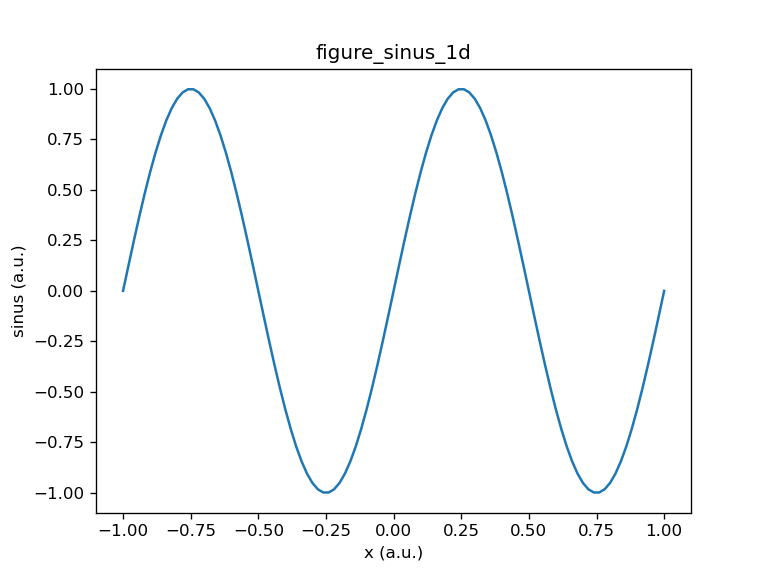

In [2]:
x = np.linspace(-1, 1, 101)

ds = Dataset(
    name='sinus',
    value=np.sin(2*np.pi*x),
)

ax = Axis(
    name='x',
    value=x,
    dim=0)
ds.add_axis(ax)

plot = Plot1D([ds])

## Compute mean directly to a dataset
Equivalent to np.mean

Note: mean function removes automatically the average dimension

In [3]:
new_ds = pp.mean(ds)
print(f'Mean value: {new_ds.value}')
print(f'Axes before mean: {len(ds.counter_axes)}')
print(f'Axes after mean: {len(new_ds.counter_axes)}')

Mean value: 1.1864956160230028e-17
Axes before mean: 1
Axes after mean: 0


## Compute gradient
Equivalent to np.gradient

<IPython.core.display.Javascript object>


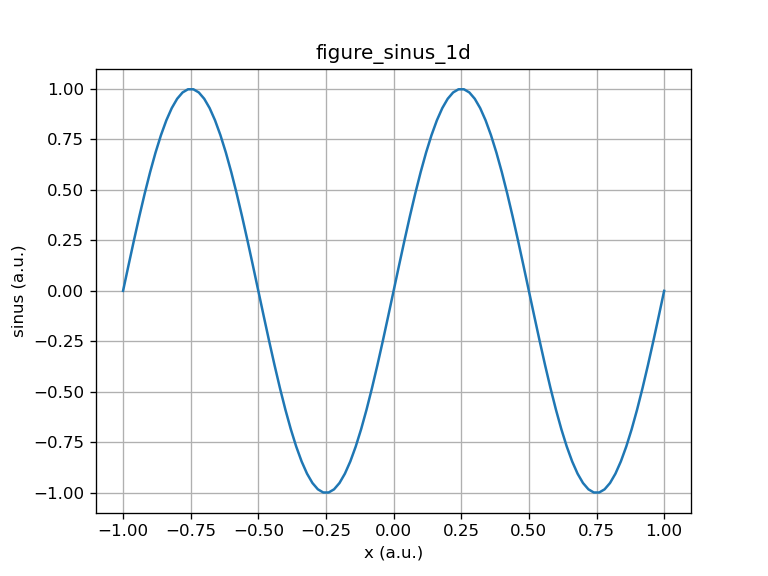

In [4]:
new_ds = pp.gradient(ds)
plot = Plot1D([new_ds,ds])

In [5]:
plot.ax.grid()

## Take values from a given range
Equivalent to np.take

In [6]:
new_ds = pp.take(ds, indices=[1,3,6,7,8])
print(new_ds.value)

[0.12533323 0.36812455 0.68454711 0.77051324 0.84432793]


## Substract 2 datasets

<IPython.core.display.Javascript object>


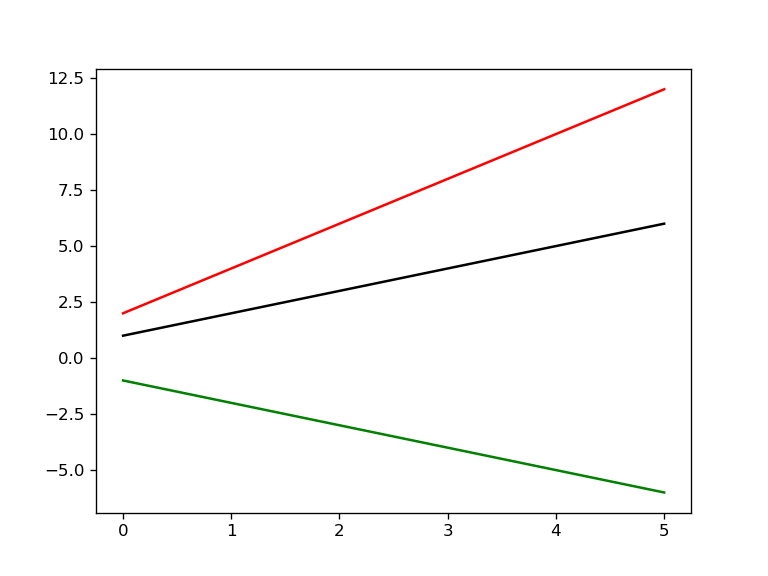

In [7]:
ds1 = Dataset(
    name='ds1',
    value=[1,2,3,4,5,6],
)

ds2 = Dataset(
    name='ds2',
    value=[2,4,6,8,10,12],
)

ds_sub = pp.subtract(ds1,ds2)

fig, ax = plt.subplots(1)
ax.plot(ds1.value,'k')
ax.plot(ds2.value,'r')
ax.plot(ds_sub.value,'g')

## Filter: change value in a given range
For example, I want to change all the value of the sinus between -0.5 to +0.5 to 0.

<IPython.core.display.Javascript object>


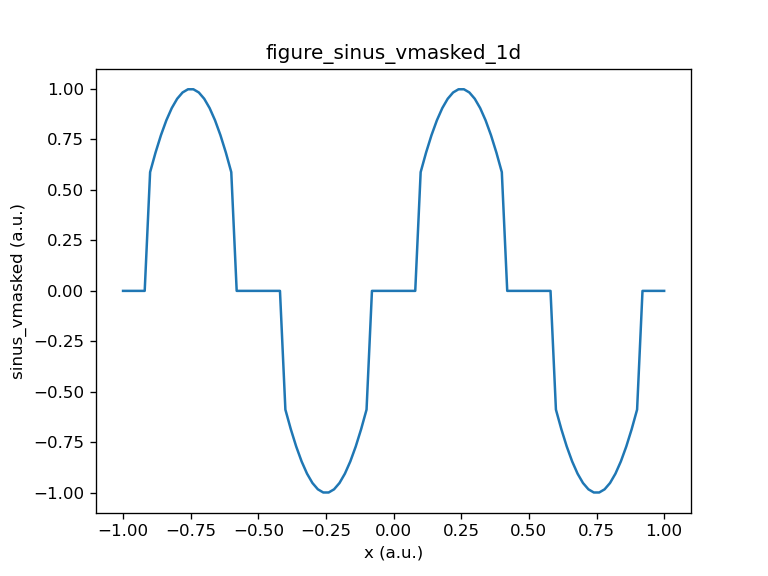

In [8]:
new_ds = pp.value_mask_by_range(
    dataset=ds,
    init=-0.5,
    final=0.5,
    value=0,
    unit=None, # in case you want to set your own units
)
plot = Plot1D([new_ds,ds])

## Get a boolean mask
pp.boolmask(dataset, value, key='==')

key can be '==', '>=', '<=', '!=', '>', '<' 

In [9]:
# For values == 0
ds3 = Dataset(
    name='ds3',
    value=[-1,-0.5,0,0.5,1],
)
ds_bool1 = pp.boolmask(
    dataset=ds3,
    value=0,
    key='==',
)
# For values >= 0.5
ds_bool2 = pp.boolmask(
    dataset=ds3,
    value=0.5,
    key='>=',
)

print('value', ds3.value)
print('value == 0', ds_bool1.value)
print('value >= 0.5', ds_bool2.value)

value [-1.  -0.5  0.   0.5  1. ]
value == 0 [False False  True False False]
value >= 0.5 [False False False  True  True]


## Comments
The postprocessing functions are at a preliminary stage.

For instance, we should:

- make a simple tutorial of adding functions
- every time that we use a numpy function, we should add *args, **kwargs in the function to exploit all the functionalities
- add every time docstring to each function with information about the arguments
- check the handling of axes (e.g. take function is not handling axis when axis=None)
